In [4]:
import os
from getpass import getpass

os.environ["OPENAI_API_KEY"] = getpass("OpenAI API key 입력: ")

In [5]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage

# 모델 초기화
model = ChatOpenAI(model="gpt-4o-mini")

In [1]:
from langchain.document_loaders import PyPDFLoader

# PDF 파일 로드. 파일의 경로 입력
loader = PyPDFLoader("AI.pdf")

# 페이지 별 문서 로드
docs = loader.load()

In [2]:
from langchain.text_splitter import CharacterTextSplitter

text_splitter = CharacterTextSplitter(
    separator="\n\n",
    chunk_size=100,
    chunk_overlap=10,
    length_function=len,
    is_separator_regex=False,
)

splits = text_splitter.split_documents(docs)
splits[:10]

[Document(metadata={'source': 'AI.pdf', 'page': 0}, page_content='2024년 11월호'),
 Document(metadata={'source': 'AI.pdf', 'page': 1}, page_content='2024년 11월호\nⅠ. 인공지능 산업 동향 브리프 1. 정책/법제    ▹ 미국 민권위원회, 연방정부의 얼굴인식 기술 사용에 따른 민권 영향 분석························1   ▹ 미국 백악관 예산관리국, 정부의 책임 있는 AI 조달을 위한 지침 발표·····························2   ▹ 유로폴, 법 집행에서 AI의 이점과 과제를 다룬 보고서 발간··············································3   ▹ OECD, 공공 부문의 AI 도입을 위한 G7 툴킷 발표··························································4   ▹ 세계경제포럼, 생성AI 시대의 거버넌스 프레임워크 제시····················································5  2. 기업/산업    ▹ CB인사이츠 분석 결과, 2024년 3분기 벤처 투자 31%가 AI 스타트업에 집중··············6   ▹ 메타, 동영상 생성AI 도구 ‘메타 무비 젠’ 공개···································································7   ▹ 메타, 이미지와 텍스트 처리하는 첫 멀티모달 AI 모델 ‘라마 3.2’ 공개···························8   ▹ 앨런AI연구소, 벤치마크 평가에서 GPT-4o 능가하는 성능의 오픈소스 LLM ‘몰모’ 공개····9   ▹ 미스트랄AI, 온디바이스용 AI 모델 ‘레 미니스트로’ 공개·················································10 

In [3]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

recursive_text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=10,
    length_function=len,
    is_separator_regex=False,
)

splits = recursive_text_splitter.split_documents(docs)
splits[:10]

[Document(metadata={'source': 'AI.pdf', 'page': 0}, page_content='2024년 11월호'),
 Document(metadata={'source': 'AI.pdf', 'page': 1}, page_content='2024년 11월호'),
 Document(metadata={'source': 'AI.pdf', 'page': 1}, page_content='Ⅰ. 인공지능 산업 동향 브리프 1. 정책/법제    ▹ 미국 민권위원회, 연방정부의 얼굴인식 기술 사용에 따른 민권 영향 분석························1'),
 Document(metadata={'source': 'AI.pdf', 'page': 1}, page_content='▹ 미국 백악관 예산관리국, 정부의 책임 있는 AI 조달을 위한 지침 발표·····························2   ▹ 유로폴, 법 집행에서 AI의 이점과'),
 Document(metadata={'source': 'AI.pdf', 'page': 1}, page_content='AI의 이점과 과제를 다룬 보고서 발간··············································3   ▹ OECD, 공공 부문의 AI 도입을 위한 G7'),
 Document(metadata={'source': 'AI.pdf', 'page': 1}, page_content='도입을 위한 G7 툴킷 발표··························································4   ▹ 세계경제포럼, 생성AI 시대의'),
 Document(metadata={'source': 'AI.pdf', 'page': 1}, page_content='생성AI 시대의 거버넌스 프레임워크 제시····················································5  2. 기업/산업    ▹ CB인사이츠'),
 Document

1. **CharacterTextSplitter**

CharacterTextSplitter는 주어진 텍스트를 고정된 크기의 청크로 나누는 데 사용됩니다. 기본적으로 텍스트를 separator로 구분하고, 구분된 텍스트가 chunk_size로 설정된 크기를 초과하지 않도록 합니다.

* **Parameters**
    * `separator`: 텍스트를 분할할 구분자입니다. 기본적으로 \n\n (빈 줄)을 사용하여 텍스트를 나누며, 이 구분자가 텍스트 내에서 찾아지는 위치에서 분할됩니다. 정규식도 사용할 수 있습니다. 

    * `chunk_size`: 각 청크의 최대 길이를 설정합니다. 이 크기를 초과하지 않도록 텍스트가 나누어집니다.

    * `chunk_overlap`: 청크 사이에 겹치는 문자의 개수입니다. 이 값만큼은 각 청크가 겹쳐서 나누어지게 됩니다.

    * `length_function`: 텍스트의 길이를 측정하는 함수입니다. 기본적으로 len 함수를 사용하여 텍스트 길이를 계산합니다. 다른 방식으로 길이를 측정할 수 있습니다.

    * `is_separator_regex`: separator가 정규식인지 여부를 설정하는 옵션입니다. 기본값은 False로, separator는 단순히 문자열로 처리됩니다. True인 경우, separator는 정규식으로 처리됩니다.


2. **RecursiveCharacterTextSplitter**

RecursiveCharacterTextSplitter는 텍스트를 반복적으로 분할하여 더 세부적인 청크를 생성합니다. 이 방식은 더 유연하게 텍스트를 나누고, 자연스럽게 텍스트의 구조를 반영할 수 있도록 설계되었습니다. 청크를 분할할 때, chunk_size와 chunk_overlap의 규칙을 만족할 수 있도록 텍스트를 분해합니다.

* **Parameters**
    * `chunk_size`: 각 청크의 최대 크기입니다. CharacterTextSplitter와 마찬가지로 이 값을 초과하지 않도록 텍스트가 분할됩니다.

    * `chunk_overlap`: 각 청크 사이의 겹침 범위입니다. 청크가 나누어질 때, 이만큼의 문자가 겹치게 됩니다.

    * `length_function`: 텍스트의 길이를 계산하는 함수입니다. 기본적으로 len을 사용하지만, 필요에 따라 다른 함수로 설정할 수 있습니다.

    * `is_separator_regex`: separator가 정규식인지 여부를 설정하는 옵션입니다. 기본값은 False로, separator는 단순히 문자열로 처리됩니다. True로 설정하면 정규식이 적용됩니다.

In [9]:
from langchain_openai import OpenAIEmbeddings

# OpenAI 임베딩 모델 초기화
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")

In [10]:
from langchain_openai import OpenAIEmbeddings
import faiss
from langchain_community.vectorstores import FAISS
from uuid import uuid4

# OpenAI 임베딩 모델 초기화
embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")

# 페이지 별 고유 ID 생성
uuids = [f"page_{i+1}" for i in range(len(splits))]

# FAISS 벡터 스토어 생성
vector_store = FAISS.from_documents(
    documents=splits, ids=uuids, embedding=embeddings)

In [11]:
retriever = vector_store.as_retriever(
    search_type="similarity", search_kwargs={"k": 1})

In [12]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough

# 프롬프트 템플릿 정의
contextual_prompt = ChatPromptTemplate.from_messages([
    ("system", "Answer the question using only the following context."),
    ("user", "Context: {context}\\n\\nQuestion: {question}")
])

In [ ]:
from langchain.chains import LLMChain


class SimplePassThrough:
    def invoke(self, inputs, **kwargs):
        return inputs


class ContextToPrompt:
    def __init__(self, prompt_template):
        self.prompt_template = prompt_template

    def invoke(self, inputs):
        # 문서 내용을 텍스트로 변환
        if isinstance(inputs, list):
            context_text = "\n".join([doc.page_content for doc in inputs])
        else:
            context_text = inputs

        # 프롬프트 템플릿에 적용
        formatted_prompt = self.prompt_template.format_messages(
            context=context_text,
            question=inputs.get("question", "")
        )
        return formatted_prompt

# Retriever를 invoke() 메서드로 래핑하는 클래스 정의


class RetrieverWrapper:
    def __init__(self, retriever):
        self.retriever = retriever

    def invoke(self, inputs):
        if isinstance(inputs, dict):
            query = inputs.get("question", "")
        else:
            query = inputs
        # 검색 수행
        response_docs = self.retriever.get_relevant_documents(query)
        return response_docs


llm_chain = LLMChain(llm=model, prompt=contextual_prompt)

# RAG 체인 구성
rag_chain_debug = {
    "context": RetrieverWrapper(retriever),
    "prompt": ContextToPrompt(contextual_prompt),
    "llm": model
}

C:\Users\82103\AppData\Local\Temp\ipykernel_13256\4035824484.py:44: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  llm_chain = LLMChain(llm=model, prompt=contextual_prompt)


In [14]:
# 챗봇 구동
query = ''
while query != 'stop':
    print("========================")
    query = input("질문을 입력하세요 : ")

    if query == 'stop':
        print("RAG 실행을 종료합니다.")
        break
    
    # 1. Retriever로 관련 문서 검색
    response_docs = rag_chain_debug["context"].invoke({"question": query})

    # 2. 문서를 프롬프트로 변환
    prompt_messages = rag_chain_debug["prompt"].invoke({
        "context": response_docs,
        "question": query
    })

    # 3. LLM으로 응답 생성
    response = rag_chain_debug["llm"].invoke(prompt_messages)

    print("\n답변:")
    print(response.content)

C:\Users\82103\AppData\Local\Temp\ipykernel_13256\4035824484.py:40: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response_docs = self.retriever.get_relevant_documents(query)



답변:
2024년 11월 인공지능 산업 동향에 대한 구체적인 정보는 제공되지 않았으나, AI 분야의 전문가들이 직업 전망을 낙관적으로 보고 있으며, 2025년에 이직을 계획 중인 전문가가 73%에 달하는 것으로 보아, 인공지능 산업이 계속해서 성장하고 있다는 점을 알 수 있습니다.
RAG 실행을 종료합니다.


### [ 일반 chat gpt 답변 ]

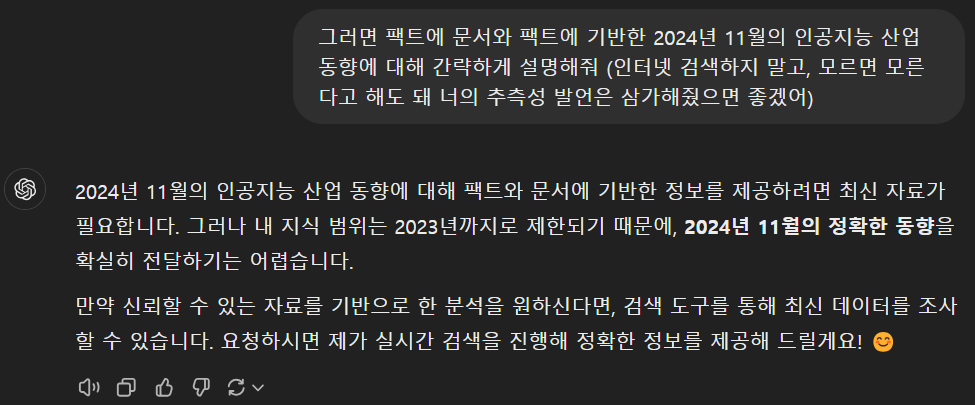

* RAG 기능을 사용하지 않는 LLM은 업데이트 주기가 짧을 수 없기 때문에 최신 정보를 제공하는 데 한계가 있다.

In [27]:
####### 도전과제 prompt1 ########
from langchain.text_splitter import CharacterTextSplitter
from langchain.prompts import ChatPromptTemplate
import datetime

# 파일 경로 설정
prompt_file_path = "Prompts/prompt1.txt"

# 텍스트 파일에서 프롬프트 읽기
with open(prompt_file_path, 'r', encoding='utf-8') as file:
    prompt_text = file.read()

# 프롬프트 템플릿 정의
prompt = ChatPromptTemplate.from_messages([
    ("system", prompt_text),
    ("user", "Context: {context}\\n\\nQuestion: {question}")
])

# RAG 체인 구성
rag_chain_debug = {
    "context": RetrieverWrapper(retriever),
    "prompt": ContextToPrompt(prompt),
    "llm": model
}

query = ''
responses = []  # 결과를 저장할 리스트
while query != 'stop':
    print("========================")
    query = input("질문을 입력하세요 : ")

    if query == 'stop':
        print("RAG 실행을 종료합니다.")
        break

    # 1. Retriever로 관련 문서 검색
    response_docs = rag_chain_debug["context"].invoke({"question": query})

    # 2. 문서를 프롬프트로 변환
    prompt_messages = rag_chain_debug["prompt"].invoke({
        "context": response_docs,
        "question": query
    })

    # 3. LLM으로 응답 생성
    response = rag_chain_debug["llm"].invoke(prompt_messages)

    print("\n답변:")
    print(response.content)

    # 결과 저장
    responses.append(response.content)  # 리스트에 저장

# 파일 이름 생성
experiment_name = "prompt1"  # 프롬프트 이름 설정
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")  # 현재 타임스탬프
file_name = f"{experiment_name}_{timestamp}.txt"  # 파일 이름에 프롬프트 이름과 타임스탬프 포함

# 파일로 저장
with open(file_name, "w", encoding="utf-8") as file:
    for i, resp in enumerate(responses, 1):
        file.write(f"{i}. {resp}\n")
        file.write("========================\n")  # 구분선 추가


답변:
2024년 11월 인공지능 산업 동향에 따르면, 시장이 침체되고 있는 상황에서도 AI 분야는 기술과 사업의 핵심 요소로 부각되고 있습니다. AI 전문가들 사이에서 직업 전망이 낙관적이며, 73%의 전문가가 2025년에 이직을 계획하고 있다고 보고되고 있습니다. 또한, 58%는 2024년에 새로운 기회를 모색하고 있는 것으로 나타났습니다. 이는 AI 분야의 성장 가능성과 인력 수요가 여전히 높다는 것을 시사합니다.

AI는 다양한 산업에서 더욱 많은 응용을 찾고 있으며, 특히 데이터 분석, 머신러닝, 자동화 및 개인화 서비스 등에서 주요한 역할을 하고 있습니다. 이러한 경향은 기업들이 인공지능을 통해 효율성을 높이고 경쟁 우위를 확보하려는 노력과 맞물려 있습니다.

AI 전문가들 사이에서의 이동과 새로운 기회 탐색은 인공지능 기술의 지속적인 발전과 관련 산업의 혁신을 더욱 가속화할 것으로 보입니다.

AI judgment: 인공지능 산업은 2025년까지 계속해서 성장할 것으로 예상되며, 전문가들의 이직 및 새로운 기회 탐색은 AI 생태계의 다변화와 발전에 긍정적인 영향을 미칠 것입니다. 이는 결국 기업의 AI 채택 증가와 함께 전체 산업의 혁신을 촉진할 것입니다.
RAG 실행을 종료합니다.


In [ ]:
####### 도전과제 prompt2 ########
from langchain.text_splitter import CharacterTextSplitter
from langchain.prompts import ChatPromptTemplate
import datetime

# 파일 경로 설정
prompt_file_path = "Prompts/prompt2.txt"

# 텍스트 파일에서 프롬프트 읽기
with open(prompt_file_path, 'r', encoding='utf-8') as file:
    prompt_text = file.read()

# 프롬프트 템플릿 정의
prompt = ChatPromptTemplate.from_messages([
    ("system", prompt_text),
    ("user", "Context: {context}\\n\\nQuestion: {question}")
])

# RAG 체인 구성
rag_chain_debug = {
    "context": RetrieverWrapper(retriever),
    "prompt": ContextToPrompt(prompt),
    "llm": model
}

query = ''
responses = []  # 결과를 저장할 리스트
while query != 'stop':
    print("========================")
    query = input("질문을 입력하세요 : ")

    if query == 'stop':
        print("RAG 실행을 종료합니다.")
        break

    # 1. Retriever로 관련 문서 검색
    response_docs = rag_chain_debug["context"].invoke({"question": query})

    # 2. 문서를 프롬프트로 변환
    prompt_messages = rag_chain_debug["prompt"].invoke({
        "context": response_docs,
        "question": query
    })

    # 3. LLM으로 응답 생성
    response = rag_chain_debug["llm"].invoke(prompt_messages)

    print("\n답변:")
    print(response.content)

    # 결과 저장
    responses.append(response.content)  # 리스트에 저장

# 파일 이름 생성
experiment_name = "prompt2"  # 프롬프트 이름 설정
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")  # 현재 타임스탬프
file_name = f"{experiment_name}_{timestamp}.txt"  # 파일 이름에 프롬프트 이름과 타임스탬프 포함

# 파일로 저장
with open(file_name, "w", encoding="utf-8") as file:
    for i, resp in enumerate(responses, 1):
        file.write(f"{i}. {resp}\n")
        file.write("========================\n")  # 구분선 추가


답변:
Page Number: 20  
Page Summary: 2024년에는 AI 분야가 기술과 사업의 핵심 요소로 부상하고 있으며, AI 전문가들의 직업 전망이 낙관적이다. 조사에 따르면, AI 전문가의 73%가 2025년에 이직을 계획하고 있고, 58%는 2024년 내에 이직을 고려하고 있다.  

Relevance Score: 0.9  

Document with the Highest Relevance Score: AI.pdf (Page 20)  
Score: 0.9
RAG 실행을 종료합니다.


In [29]:
####### 도전과제 prompt3 ########
from langchain.text_splitter import CharacterTextSplitter
from langchain.prompts import ChatPromptTemplate
import datetime

# 파일 경로 설정
prompt_file_path = "Prompts/prompt3.txt"

# 텍스트 파일에서 프롬프트 읽기
with open(prompt_file_path, 'r', encoding='utf-8') as file:
    prompt_text = file.read()

# 프롬프트 템플릿 정의
prompt = ChatPromptTemplate.from_messages([
    ("system", prompt_text),
    ("user", "Context: {context}\\n\\nQuestion: {question}")
])

# RAG 체인 구성
rag_chain_debug = {
    "context": RetrieverWrapper(retriever),
    "prompt": ContextToPrompt(prompt),
    "llm": model
}

query = ''
responses = []  # 결과를 저장할 리스트
while query != 'stop':
    print("========================")
    query = input("질문을 입력하세요 : ")

    if query == 'stop':
        print("RAG 실행을 종료합니다.")
        break

    # 1. Retriever로 관련 문서 검색
    response_docs = rag_chain_debug["context"].invoke({"question": query})

    # 2. 문서를 프롬프트로 변환
    prompt_messages = rag_chain_debug["prompt"].invoke({
        "context": response_docs,
        "question": query
    })

    # 3. LLM으로 응답 생성
    response = rag_chain_debug["llm"].invoke(prompt_messages)

    print("\n답변:")
    print(response.content)

    # 결과 저장
    responses.append(response.content)  # 리스트에 저장

# 파일 이름 생성
experiment_name = "prompt3"  # 프롬프트 이름 설정
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")  # 현재 타임스탬프
file_name = f"{experiment_name}_{timestamp}.txt"  # 파일 이름에 프롬프트 이름과 타임스탬프 포함

# 파일로 저장
with open(file_name, "w", encoding="utf-8") as file:
    for i, resp in enumerate(responses, 1):
        file.write(f"{i}. {resp}\n")
        file.write("========================\n")  # 구분선 추가


답변:
2024년 11월 인공지능 산업 동향은 기술의 발전과 함께 전문가들의 직업 전망이 긍정적임을 보여줍니다. 2024년에도 AI 분야는 시장의 핵심 요소로 자리잡고 있으며, AI 전문가의 73%가 2025년에 이직을 계획하고 있습니다. 또한, 58%는 2024년에 새로운 기회를 모색하고 있습니다. 따라서 인공지능 산업은 여전히 성장 가능성이 높고, 전문가들의 수요도 지속적으로 증가할 것으로 예상됩니다.

### Keywords:
1. 인공지능 (AI)
2. 전문가
3. 직업 전망
4. 이직 계획
5. 시장 동향
6. 성장 가능성

### Explanation of Keywords:
1. **인공지능 (AI)**: 이 질문의 중심 주제로, 2024년의 동향을 이해하는 데 필수적인 요소입니다.
2. **전문가**: AI 분야에서의 전문가들이 어떻게 변화하고 있는지를 나타내는 중요한 키워드입니다.
3. **직업 전망**: 전문가들의 직업에 대한 긍정적인 예측은 산업의 건강성을 나타내며, 이 키워드는 미래의 경향을 이해하는 데 중요합니다.
4. **이직 계획**: AI 전문가들이 이직을 계획하고 있다는 사실은 업계의 변화와 개인의 경력에 대한 통찰을 제공합니다.
5. **시장 동향**: 이 키워드는 AI 산업의 현재와 미래에 대한 분석을 포함하며, 시장의 변화를 이해하는 데 기여합니다.
6. **성장 가능성**: AI 산업이 계속해서 성장할 것으로 기대되며, 이는 투자의 방향과 정책 결정에도 영향을 미치는 중요한 요소입니다.
RAG 실행을 종료합니다.
